In [202]:
import pandas as pd
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
import re
%matplotlib inline



In [203]:
#Read Data
df_origin = pd.read_csv("credit-data.csv", index_col=0)


In [204]:
#change the col name to lower case
def camel_to_snake(column_name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df_origin.columns = [camel_to_snake(col) for col in df_origin.columns]
df_origin.head(10)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,zipcode,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
PersonID,,,,,,,,,,,,
1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,60637,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,60804,0,46.000000,NaN,2,0,0,0,NaN


In [205]:
#Explore Data
df_origin.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,zipcode,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [206]:
#see dependents distribution
pd.value_counts(df_origin.number_of_dependents, sort=True)

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: number_of_dependents, dtype: int64

In [207]:
#check the roughly relationship between age and number of times borrower has been 90 days or more past due.
pd.crosstab(df_origin.age,df_origin.number_of_times90_days_late)

number_of_times90_days_late,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,96,98
age,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,160,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22
22,398,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25
23,585,31,9,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,14
24,726,49,13,7,2,0,1,0,0,0,0,0,0,0,0,0,0,0,18
25,844,58,21,6,4,3,0,0,0,0,0,0,0,0,0,0,0,0,17
26,1066,74,22,13,6,2,0,0,0,0,0,0,0,0,0,0,0,1,9
27,1197,82,26,12,5,0,0,0,1,0,0,0,0,0,0,0,0,0,15
28,1367,120,36,11,5,5,2,1,0,1,0,0,0,0,0,0,0,0,12


In [208]:


#Pre-Process Data: find the missing data and fill in with the mean
null_variables = df_origin.isnull()
null_variables.sum()


serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
zipcode                                            0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                         0
monthly_income                                 29731
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                            3924
dtype: int64

In [209]:
df_origin = df_origin.fillna(df_origin.mean())
df_origin.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,zipcode,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
PersonID,,,,,,,,,,,,
1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [210]:

#feature selection: RandomForestClassifier used here to make the feature selection

features = np.array(['revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse',
            'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 'number_of_times90_days_late',
            'number_real_estate_loans_or_lines','number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'])

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_origin[features], df_origin.serious_dlqin2yrs, test_size=0.25)

clf =RandomForestClassifier()
clf.fit(train_x, train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

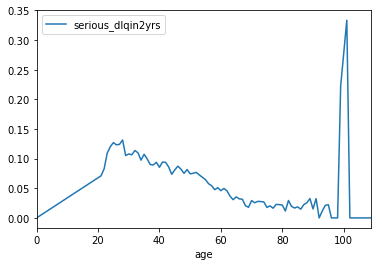

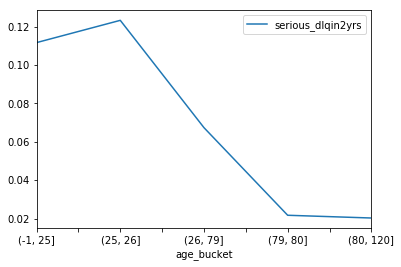

In [211]:
age_means = df_origin[['age', 'serious_dlqin2yrs']].groupby("age").mean()
plot1 = age_means.plot()
plot1.get_figure().savefig('plot1.pdf', bbox_inches='tight')

df_origin["age_bucket"] = pd.cut(df_origin.age, range(-1, 110, 10))
buckets = [-1, 25] + [26, 79] + [80, 120]
df_origin["age_bucket"] = pd.cut(df_origin.age, buckets) 
pd.crosstab(df_origin.age_bucket, df_origin.serious_dlqin2yrs)
df_origin[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean()
df_origin[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().plot()

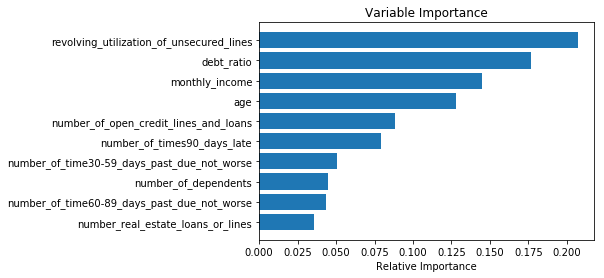

In [212]:
'''From the graph above, we can easily tell that people around 25-30 years old 
are mostly like have trouble experience financial distress in the next two years, 
we may need to consdier age as one of the features to train the data in next few steps.'''

# from the calculated importances, order them from most to least important
# and make a barplot to visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) + 0.5
pl.barh(padding, importances[sorted_idx], align='center')
pl.yticks(padding, features[sorted_idx])
pl.xlabel("Relative Importance")
pl.title("Variable Importance")
pl.show()

In [213]:
'''From the graph above, we can easily tell that 'revolving_utilization_of_unsecured_lines','debt_ratio', 
'monthly_income'and 'age' are top four features which are most likely have influence on one's financial distress 
in the next two years. 

However, as shown above, there are 20490 missing data been filled by mean value 
in 'monthly_fearture'. Thus I used 'number_of_open_credit_lines_and_loans' inseated of 'monthly_fearture' to
aovied bias here combia with other top 3 important feartures to train the data in next few steps.'''

#building model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

#The data been split into 2 groups training(75%) and test(25%). 
#The training set is adopted to calibrate the model and the test set are used to evaluate how effective it is.
is_test = np.random.uniform(0, 1, len(df_origin)) > 0.75
train = df_origin[is_test==True]
test = df_origin[is_test==False]

'''In this case, GradientBoosting Classifier been adopt'''
clf = GradientBoostingClassifier()

features = ['debt_ratio', 'age', 'revolving_utilization_of_unsecured_lines', 'number_of_open_credit_lines_and_loans']
clf.fit(train[features], train['serious_dlqin2yrs'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [214]:

#evaluating with an ROC curve 
from sklearn.metrics import roc_curve, auc
preds = clf.predict_proba(test[features])
print preds
fpr, tpr, thresholds = roc_curve(test['serious_dlqin2yrs'], preds[:, 1])
roc_auc = auc(fpr, tpr) 

[[ 0.81821711  0.18178289]
 [ 0.90561503  0.09438497]
 [ 0.95627488  0.04372512]
 ..., 
 [ 0.99080369  0.00919631]
 [ 0.96421751  0.03578249]
 [ 0.9713852   0.0286148 ]]


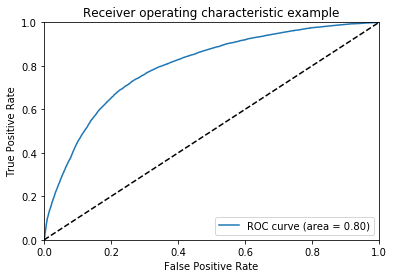

In [215]:

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()


In [147]:
'''From the ROC curve we can see that GradientBoosting classifier seems works well for this case.
The prediction arrey showing that, in the test data, each participants' probabiliy to experience/not experience
the financial distress in the next two years.'''

"From the ROC curve we can see that GradientBoosting classifier seems works well for this case.\nThe prediction arrey showing that, in the test data, each participants' probabiliy to experience/not experience\nthe financial distress in the next two years."